# Adani Enterprises Ltd Stock Price Predection

Life Cycle of Machine learning Project

* Understanding the Problem Statement

* Data Collection

* Data Checks to perform

* Exploratory data analysis

* Data Pre-Processing and Stationary Timeseries

* Model Training

* Choose best model

* Forecast 

## 1) Problem statement


* This project to build a Time Series  methodology to Forecast the Adani Enterprises Stock Prices 2023


## 2) Data Collection 

* Dataset Source -  realworld data from adani histroy data yahoofinance
    
    
* The data consists of 7 column and 1750 rows.

### 2.1 Import Data and Required Packages

### Importing Libraries

In [6]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Import the CSV Data as Pandas DataFrame

In [7]:
data=pd.read_csv("adanistock.csv")

### 2.2 Show Top 5 Records 

In [8]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,45.553741,49.422543,44.872616,49.095600,47.614208,10963906
1,2016-01-04,48.768658,50.158157,45.907928,46.371094,44.971912,9408965
2,2016-01-05,46.670792,48.823151,45.880684,48.278248,46.821522,9801814
3,2016-01-06,47.951309,48.468964,46.480076,46.997730,45.579639,7093448
4,2016-01-07,46.262115,46.262115,42.502296,43.564854,42.250347,8919023


### 2.3 Shape of the dataset 

In [9]:
data.shape

(1750, 7)

### 2.4 Dataset Information

* Date: Date(Month/Day/Year)


* Open: Price when the market opened


* High: Highest price of the day


* Low: Lowest price of the day


* Close: Price at which it closed


* Adj Close: Adjusted closing price


* Volume: Total Stock Volume traded 



## 3) Data Checks to perform

* Check Missing values


* Check Duplicates


* Check data type


* Check the number of unique values of each column


* Check statistics of data set


* Check various categories present in the different categorical column

### 3.1 Check Missing values 

In [10]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are no missing values in the data set

### 3.2 Check Duplicates

In [11]:
data.duplicated().sum()

0

There are no duplicates values in the data set

###  3.3 Check data types

In [12]:
# Check Null and Dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1750 non-null   object 
 1   Open       1750 non-null   float64
 2   High       1750 non-null   float64
 3   Low        1750 non-null   float64
 4   Close      1750 non-null   float64
 5   Adj Close  1750 non-null   float64
 6   Volume     1750 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 95.8+ KB


### 3.4 Checking the number of unique values of each column

In [13]:
data.nunique()

Date         1750
Open         1491
High         1555
Low          1547
Close        1594
Adj Close    1655
Volume       1750
dtype: int64

### 3.5 Check statistics of data set

In [14]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1.750000e+03
mean,688.173234,700.569161,675.238559,688.457278,687.474594,7.511264e+06
std,1021.967477,1036.977084,1004.148913,1021.222423,1021.504948,1.019781e+07
min,32.149174,33.402447,31.713251,32.012947,31.047001,2.482490e+05
25%,74.134321,75.891117,72.430996,74.392643,73.068065,2.789816e+06
50%,148.150002,152.000000,144.975006,148.025002,146.764984,4.716164e+06
75%,1193.587524,1237.750000,1173.500000,1198.837524,1197.533173,8.319164e+06
max,4175.000000,4190.000000,4066.399902,4165.299805,4165.299805,1.701502e+08


In [15]:
data['Date']

0       2016-01-01
1       2016-01-04
2       2016-01-05
3       2016-01-06
4       2016-01-07
           ...    
1745    2023-01-23
1746    2023-01-24
1747    2023-01-25
1748    2023-01-27
1749    2023-01-30
Name: Date, Length: 1750, dtype: object

### 3.8 Adding columns for "Year" , "Month" and "Day"

In [16]:
data[["Year","Month","Day"]]=data.Date.apply(lambda x:pd.Series(str(x).split("-")))

In [17]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2016-01-01,45.553741,49.422543,44.872616,49.095600,47.614208,10963906,2016,01,01
1,2016-01-04,48.768658,50.158157,45.907928,46.371094,44.971912,9408965,2016,01,04
2,2016-01-05,46.670792,48.823151,45.880684,48.278248,46.821522,9801814,2016,01,05
3,2016-01-06,47.951309,48.468964,46.480076,46.997730,45.579639,7093448,2016,01,06
4,2016-01-07,46.262115,46.262115,42.502296,43.564854,42.250347,8919023,2016,01,07
...,...,...,...,...,...,...,...,...,...,...
1745,2023-01-23,3443.050049,3460.000000,3412.550049,3436.350098,3436.350098,974857,2023,01,23
1746,2023-01-24,3447.449951,3508.000000,3430.000000,3442.000000,3442.000000,1518123,2023,01,24
1747,2023-01-25,3422.000000,3428.000000,3315.000000,3388.949951,3388.949951,3686439,2023,01,25
1748,2023-01-27,3335.000000,3346.500000,2712.000000,2761.449951,2761.449951,14764368,2023,01,27


In [18]:
data[["Date","Close","Year","Month","Day"]]

,Date,Close,Year,Month,Day
0,2016-01-01,49.095600,2016,01,01
1,2016-01-04,46.371094,2016,01,04
2,2016-01-05,48.278248,2016,01,05
3,2016-01-06,46.997730,2016,01,06
4,2016-01-07,43.564854,2016,01,07
...,...,...,...,...,...
1745,2023-01-23,3436.350098,2023,01,23
1746,2023-01-24,3442.000000,2023,01,24
1747,2023-01-25,3388.949951,2023,01,25
1748,2023-01-27,2761.449951,2023,01,27


### why we are converting date column as a index column

1. i can easily retrive the data

2. visulization is also simple

3. those lib has been design in such a way it required date column as a index(scipy statsmodel)

In [19]:
#conert into date time format
data["Date"]=pd.to_datetime(data["Date"])

In [20]:
da=data.set_index("Date")

In [21]:
da

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
Date,,,,,,,,,
2016-01-01,45.553741,49.422543,44.872616,49.095600,47.614208,10963906,2016,01,01
2016-01-04,48.768658,50.158157,45.907928,46.371094,44.971912,9408965,2016,01,04
2016-01-05,46.670792,48.823151,45.880684,48.278248,46.821522,9801814,2016,01,05
2016-01-06,47.951309,48.468964,46.480076,46.997730,45.579639,7093448,2016,01,06
2016-01-07,46.262115,46.262115,42.502296,43.564854,42.250347,8919023,2016,01,07
...,...,...,...,...,...,...,...,...,...
2023-01-23,3443.050049,3460.000000,3412.550049,3436.350098,3436.350098,974857,2023,01,23
2023-01-24,3447.449951,3508.000000,3430.000000,3442.000000,3442.000000,1518123,2023,01,24
2023-01-25,3422.000000,3428.000000,3315.000000,3388.949951,3388.949951,3686439,2023,01,25


In [26]:
df=da[["Close","Year","Month","Day"]]

In [27]:
df['Month'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [28]:
month_map={'01':"Jan", '02':"Feb", '03':"Mar", '04':"Apr", '05':"May", '06':"Jun", '07':"Jul", '08':"Aug", '09':"Sep", '10':"Oct", '11':"Nov",'12':"Dec"}

In [29]:
df['Month']=df['Month'].map(month_map)

In [30]:
df

,Close,Year,Month,Day
Date,,,,
2016-01-01,49.095600,2016,Jan,01
2016-01-04,46.371094,2016,Jan,04
2016-01-05,48.278248,2016,Jan,05
2016-01-06,46.997730,2016,Jan,06
2016-01-07,43.564854,2016,Jan,07
...,...,...,...,...
2023-01-23,3436.350098,2023,Jan,23
2023-01-24,3442.000000,2023,Jan,24
2023-01-25,3388.949951,2023,Jan,25


## 4) Exploratory Data Analysis

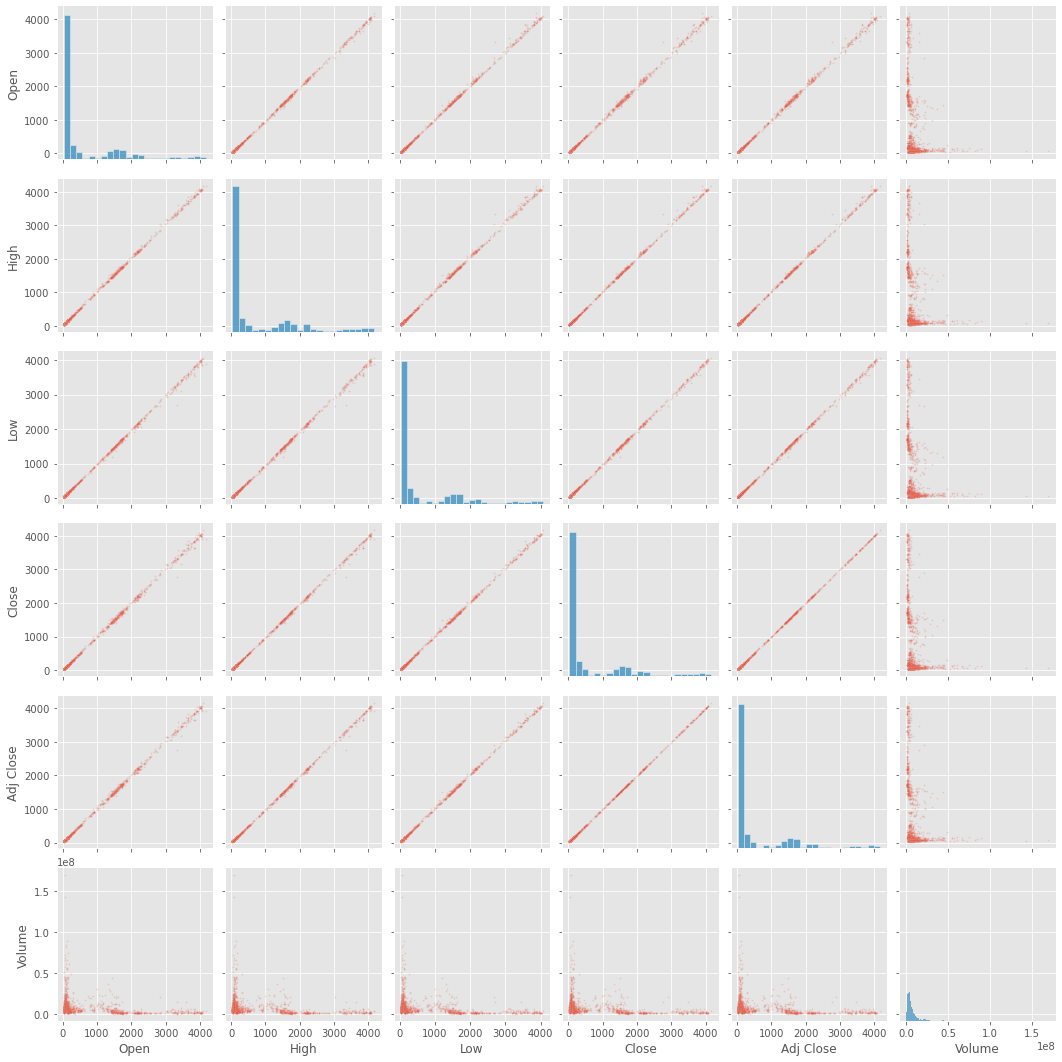

In [159]:
sns.pairplot(
    data, plot_kws={"s": 3, "alpha": 0.2}, palette="Spectral");

In [160]:
#univariate tsa
df.head()

,Close,Year,Month,Day
Date,,,,
2016-01-01,49.095600,2016,Jan,01
2016-01-04,46.371094,2016,Jan,04
2016-01-05,48.278248,2016,Jan,05
2016-01-06,46.997730,2016,Jan,06
2016-01-07,43.564854,2016,Jan,07


In [161]:
df.shape

(1750, 4)

In [163]:
df

,Close,Year,Month,Day
Date,,,,
2016-01-01,49.095600,2016,Jan,01
2016-01-04,46.371094,2016,Jan,04
2016-01-05,48.278248,2016,Jan,05
2016-01-06,46.997730,2016,Jan,06
2016-01-07,43.564854,2016,Jan,07
...,...,...,...,...
2023-01-23,3436.350098,2023,Jan,23
2023-01-24,3442.000000,2023,Jan,24
2023-01-25,3388.949951,2023,Jan,25


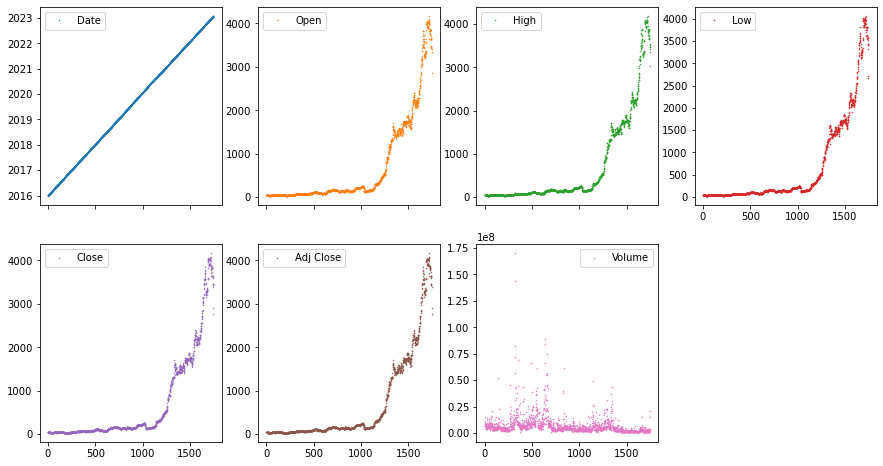

In [109]:
data.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 8), markersize=1);

In [197]:
## segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['Close'], dtype='object')
Categorical Columns: Index(['Year', 'Month', 'Day'], dtype='object')


In [201]:
df

,Close,Year,Month,Day
Date,,,,
2016-01-01,49.095600,2016,Jan,01
2016-01-04,46.371094,2016,Jan,04
2016-01-05,48.278248,2016,Jan,05
2016-01-06,46.997730,2016,Jan,06
2016-01-07,43.564854,2016,Jan,07
...,...,...,...,...
2023-01-23,3436.350098,2023,Jan,23
2023-01-24,3442.000000,2023,Jan,24
2023-01-25,3388.949951,2023,Jan,25


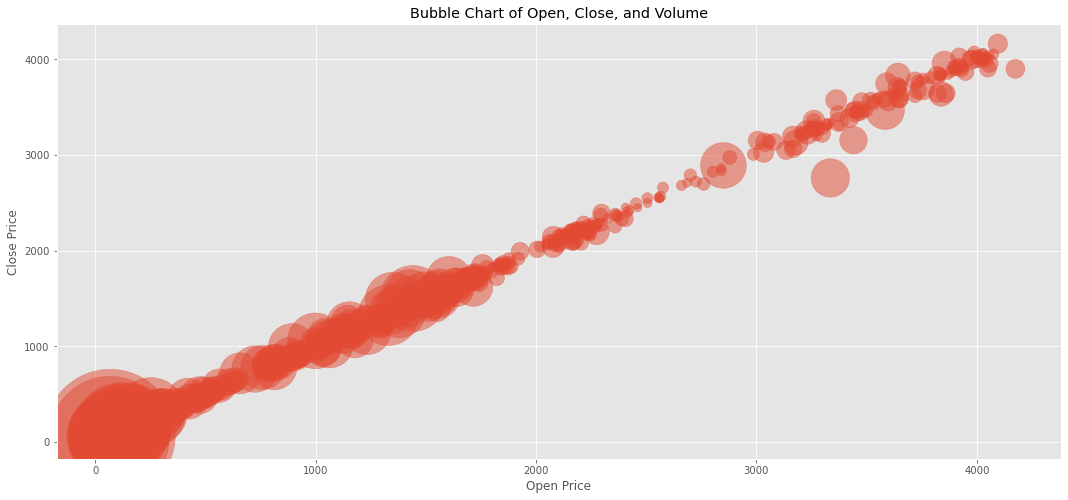

In [52]:
plt.figure(figsize=(18,8))
plt.scatter(data["Open"], data["Close"], s=data["Volume"] / 10000, alpha=0.5)
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.title("Bubble Chart of Open, Close, and Volume")
plt.show()

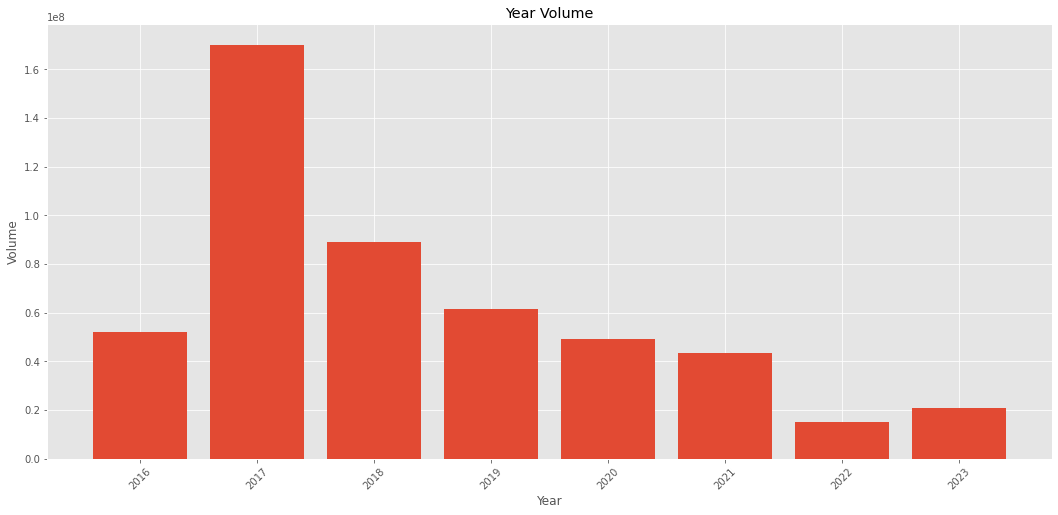

In [46]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.bar(data["Year"], data["Volume"])
plt.xlabel("Year")
plt.ylabel("Volume")
plt.title("Year Volume")
plt.xticks(rotation=45)
plt.show()

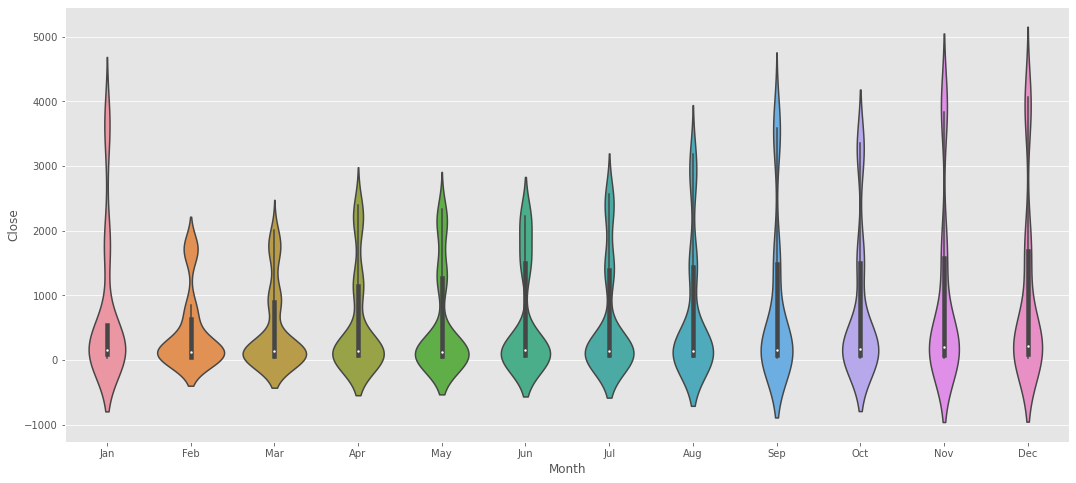

In [42]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
sns.violinplot(x="Month", y="Close",data=df)
plt.show()

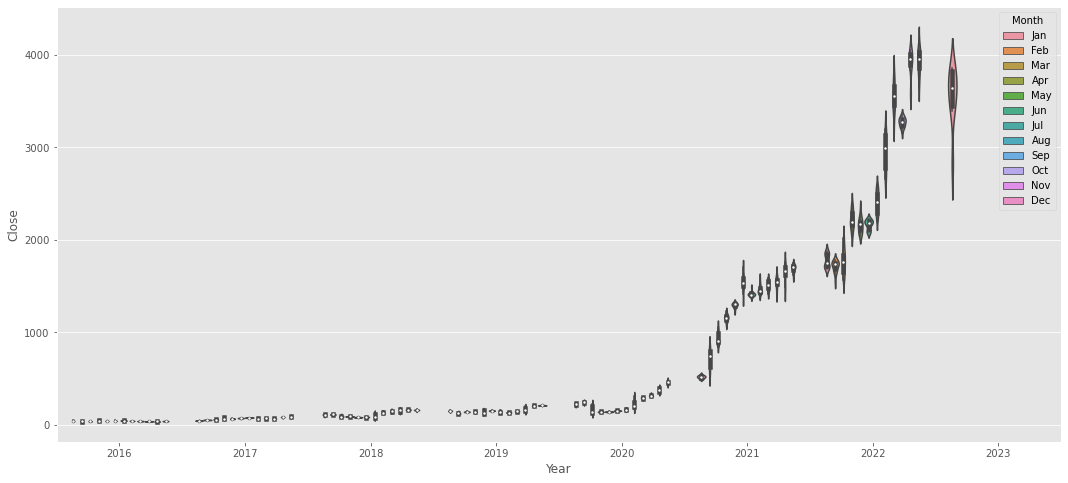

In [44]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
sns.violinplot(x="Year", y="Close",hue="Month",data=df)
plt.show()

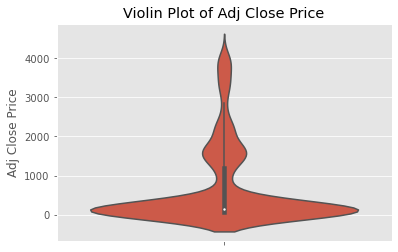

In [53]:
sns.violinplot(data=data, y="Adj Close")
plt.ylabel("Adj Close Price")
plt.title("Violin Plot of Adj Close Price")
plt.show()

In [2]:
#pip install wordcloud 

In [101]:
df.describe()

,Close
count,1750.000000
mean,688.457278
std,1021.222423
min,32.012947
25%,74.392643
50%,148.025002
75%,1198.837524
max,4165.299805


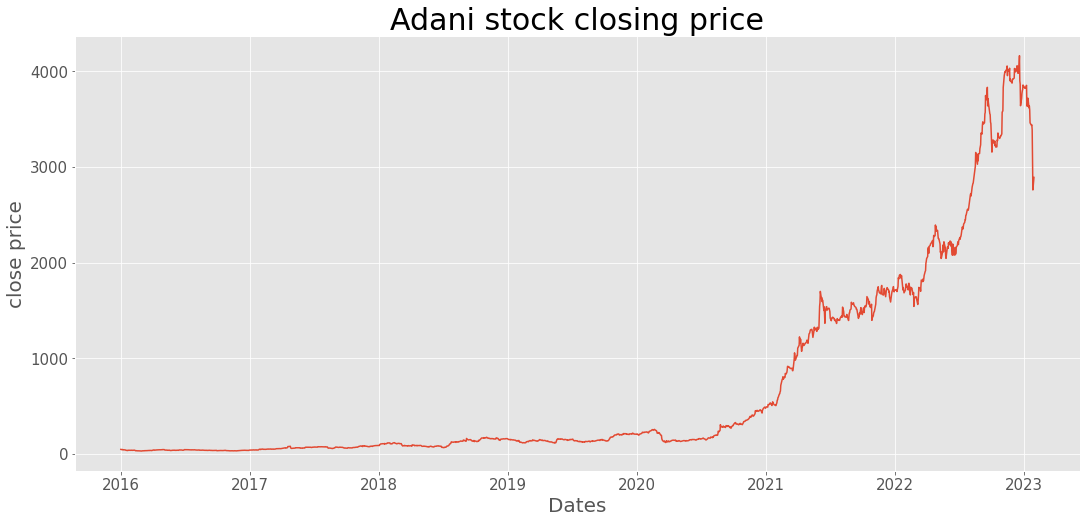

In [38]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates",fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("close price",fontsize=20)
plt.yticks(fontsize=15)
plt.plot(df["Close"])
plt.title("Adani stock closing price",fontsize=30)
plt.show()

### Distribution of Close Price

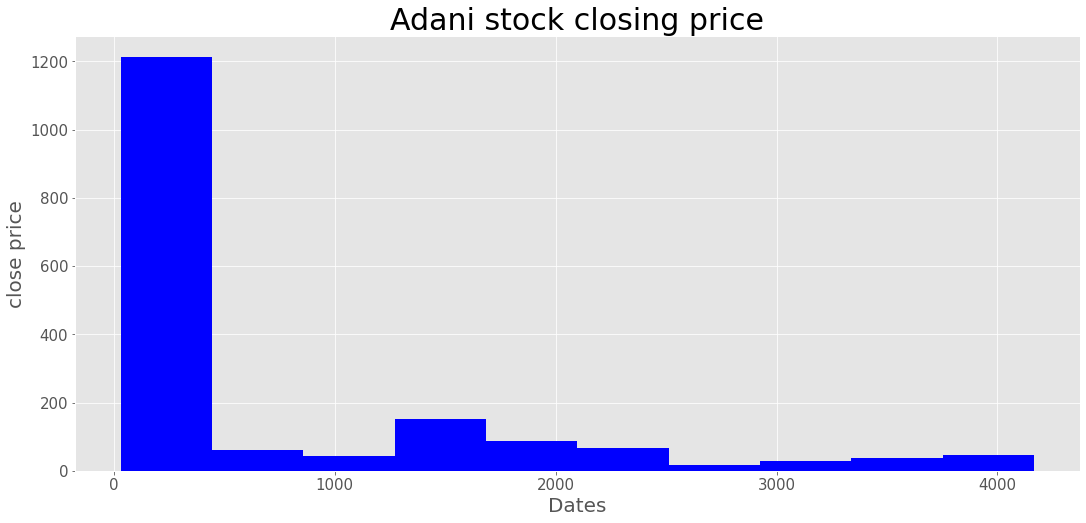

In [39]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates",fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("close price",fontsize=20)
plt.yticks(fontsize = 15) 
plt.hist(df['Close'], linewidth = 3, color = 'blue')
plt.title("Adani stock closing price",fontsize=30)
plt.show()

### Kernel Density Estimation of Close Price

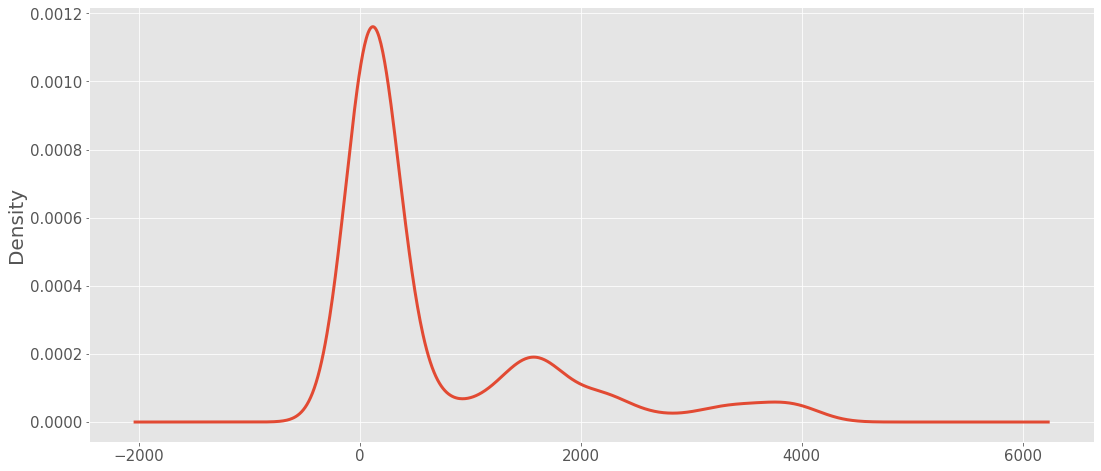

In [166]:
df_close = df['Close'] 
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

## 5) Data Pre-Processing and Stationary Timeseries

### 5.1 Moving Average


* The reason for calculating the moving average of a stock is to help smooth out the price data by creating a constantly updated average price. By calculating the moving average, the impacts of random "noise", short-term fluctuations on the price of a stock over a specified time frame are mitigated.


* The Moving Average (MA) (or) Rolling Mean: The value of MA is calculated by taking average data of the time-series within k periods.


In [167]:
#moving AVG
rolmean=df["Close"].rolling(48).mean()
rolmean

Date
2016-01-01            NaN
2016-01-04            NaN
2016-01-05            NaN
2016-01-06            NaN
2016-01-07            NaN
                 ...     
2023-01-23    3852.869792
2023-01-24    3840.866669
2023-01-25    3827.723958
2023-01-27    3801.882289
2023-01-30    3778.108332
Name: Close, Length: 1750, dtype: float64

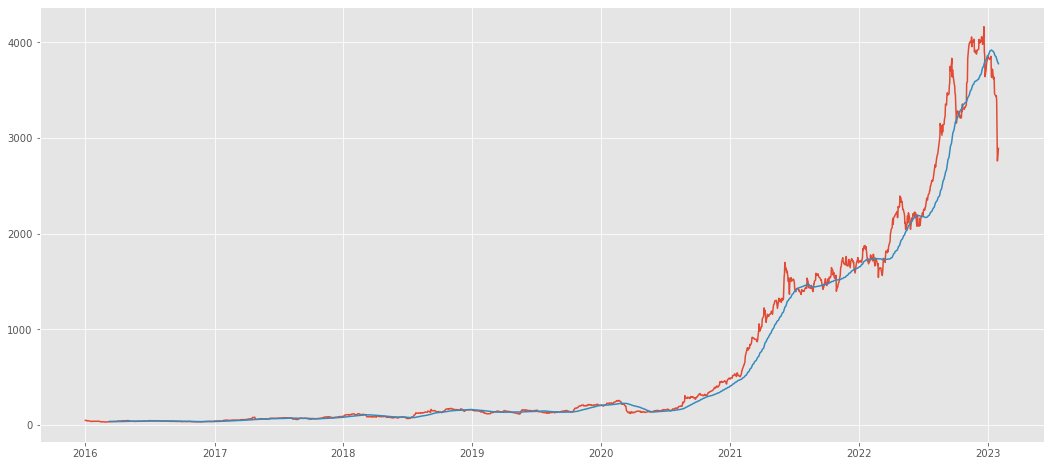

In [168]:
plt.figure(figsize=(18,8))
plt.plot(df.Close)
plt.plot(rolmean)
plt.show()

### 5.2 What will occur if we use a high rolling mean K value ?

In [169]:
#moving AVG
rolmean=df["Close"].rolling(700).mean()
rolmean

Date
2016-01-01            NaN
2016-01-04            NaN
2016-01-05            NaN
2016-01-06            NaN
2016-01-07            NaN
                 ...     
2023-01-23    1553.091500
2023-01-24    1557.817286
2023-01-25    1562.474286
2023-01-27    1566.221857
2023-01-30    1570.157215
Name: Close, Length: 1750, dtype: float64

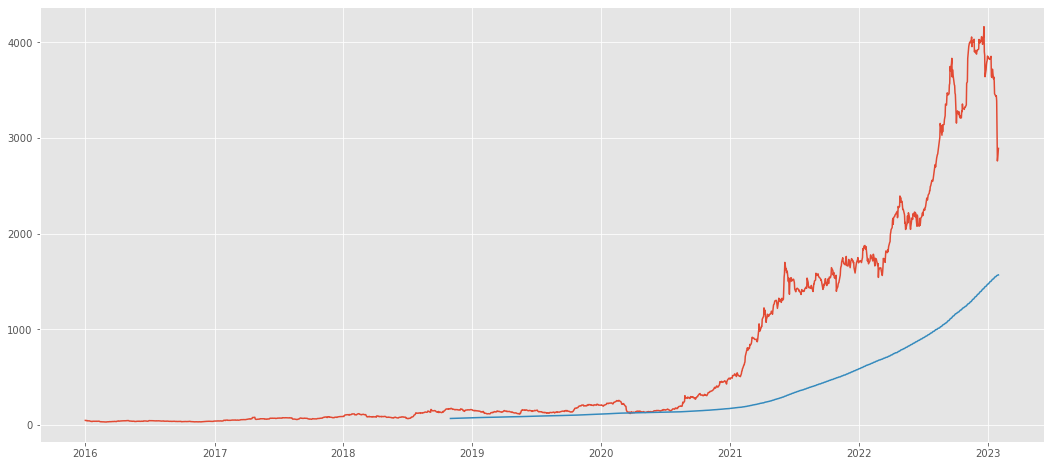

In [170]:
plt.figure(figsize=(18,8))
plt.plot(df.Close)
plt.plot(rolmean)
plt.show()

If we use a high rolling mean K value in the timeseries model, we will lose more insights from the dataset, thus we shouldn't ignore it.

### 5.3 Augmented Dickey–Fuller Test

In [171]:
#checking statstionary or non-stationary y augemted dickie fuller test
from statsmodels.tsa.stattools import adfuller
adft=adfuller(df["Close"])

In [172]:
adft

(-0.3103634720981088,
 0.9240236756700468,
 24,
 1725,
 {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 16857.278278771824)

In [173]:
pd.Series(adft[0:4],index=["test stats","p-value","lag","data point"])

test stats      -0.310363
p-value          0.924024
lag             24.000000
data point    1725.000000
dtype: float64

In [174]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    

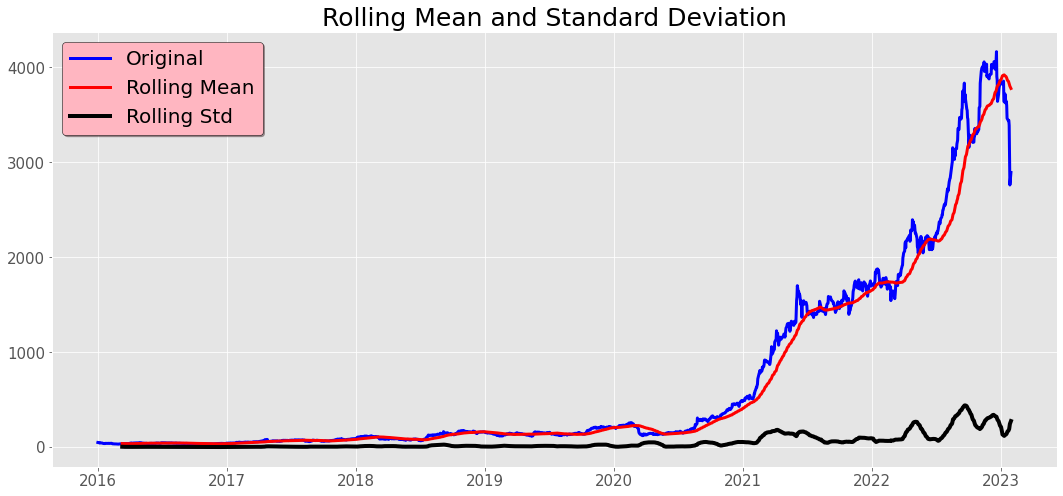

Results of dickey fuller test
Test Statistics                  -0.310363
p-value                           0.924024
No. of lags used                 24.000000
Number of observations used    1725.000000
critical value (1%)              -3.434147
critical value (5%)              -2.863217
critical value (10%)             -2.567663
dtype: float64


In [175]:
#calling test_stationary function
test_stationarity(df.Close)

### 5.4 Seasonal Decompose 

The seasonal decomposition is a method used in time series analysis to represent a time series as a sum (or, sometimes, a product) of three components – the linear trend, the periodic (seasonal) component and random residuals.

In [176]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df["Close"],model= "multiplicative",period=30)

<Figure size 1440x720 with 0 Axes>

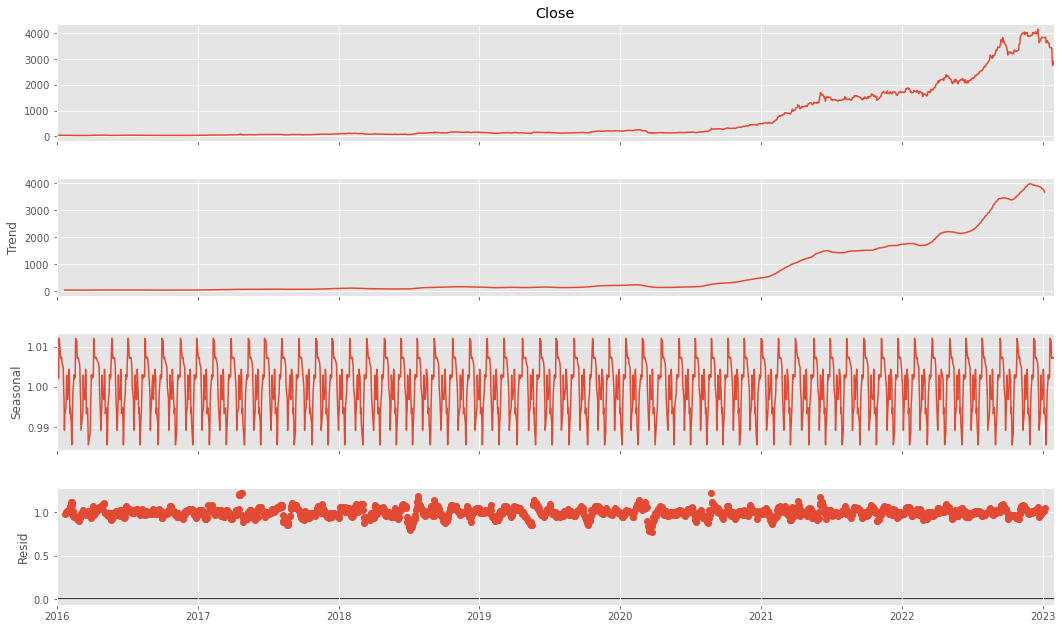

In [177]:
#decompose components
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)
plt.show()

In [178]:
result.seasonal

Date
2016-01-01    1.003033
2016-01-04    1.001983
2016-01-05    1.003006
2016-01-06    1.002511
2016-01-07    1.012131
                ...   
2023-01-23    1.011519
2023-01-24    1.007691
2023-01-25    1.007124
2023-01-27    1.007421
2023-01-30    1.007213
Name: seasonal, Length: 1750, dtype: float64

### 5.5 Checking Outliers

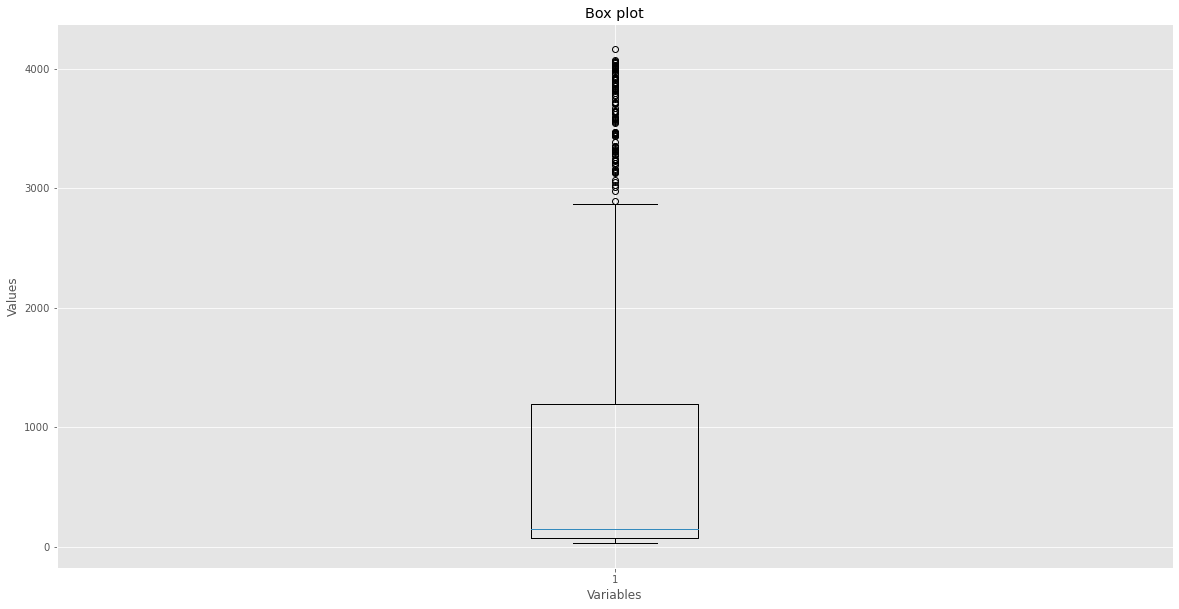

In [179]:
fig, ax = plt.subplots(figsize=(20, 10))
# Plot the box plot
ax.boxplot(df["Close"])
# Set the x-axis label
ax.set_xlabel('Variables')
# Set the y-axis label
ax.set_ylabel('Values')
# Set the title
ax.set_title('Box plot')
# Show the plot
plt.show()

In [180]:
df[df.Close>4100]

,Close,Year,Month,Day
Date,,,,
2022-12-20,4165.299805,2022,Dec,20


In [181]:
dff=df[df.Close<4100]
dff

,Close,Year,Month,Day
Date,,,,
2016-01-01,49.095600,2016,Jan,01
2016-01-04,46.371094,2016,Jan,04
2016-01-05,48.278248,2016,Jan,05
2016-01-06,46.997730,2016,Jan,06
2016-01-07,43.564854,2016,Jan,07
...,...,...,...,...
2023-01-23,3436.350098,2023,Jan,23
2023-01-24,3442.000000,2023,Jan,24
2023-01-25,3388.949951,2023,Jan,25


In [182]:
df.shape

(1750, 4)

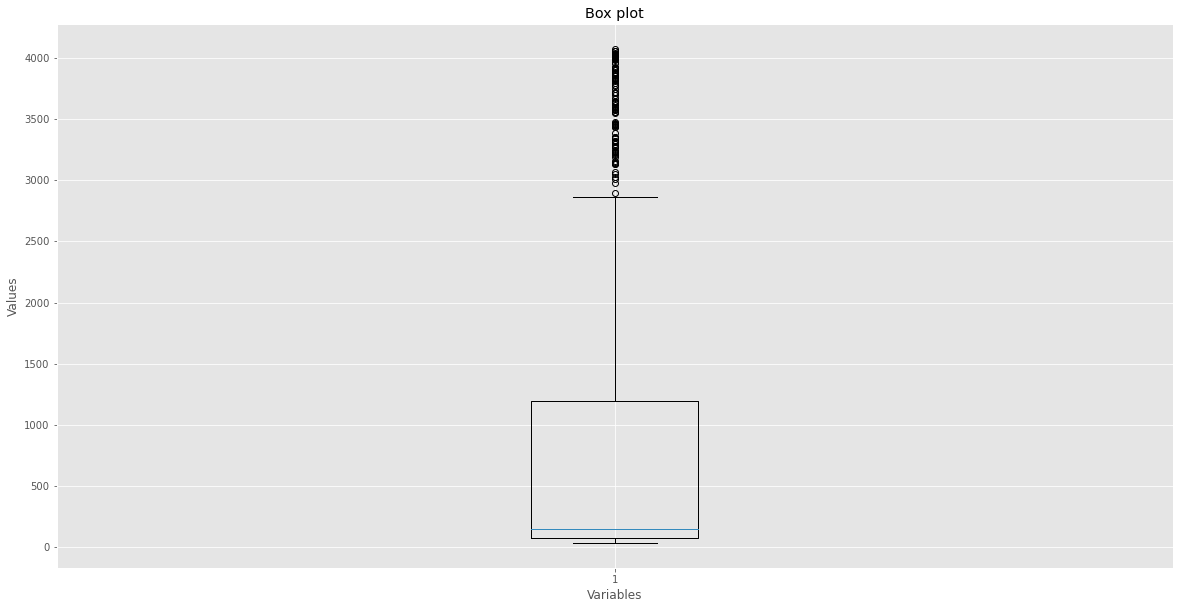

In [183]:
#removing _outliers
fig, ax = plt.subplots(figsize=(20, 10))
# Plot the box plot
ax.boxplot(dff["Close"])
# Set the x-axis label
ax.set_xlabel('Variables')
# Set the y-axis label
ax.set_ylabel('Values')
# Set the title
ax.set_title('Box plot')
# Show the plot
plt.show()

*  We can see that the close stock price have many outliers. 


*  Let we kept the validate data points which are important to forecast the stock price.


In [185]:
close=dff["Close"]

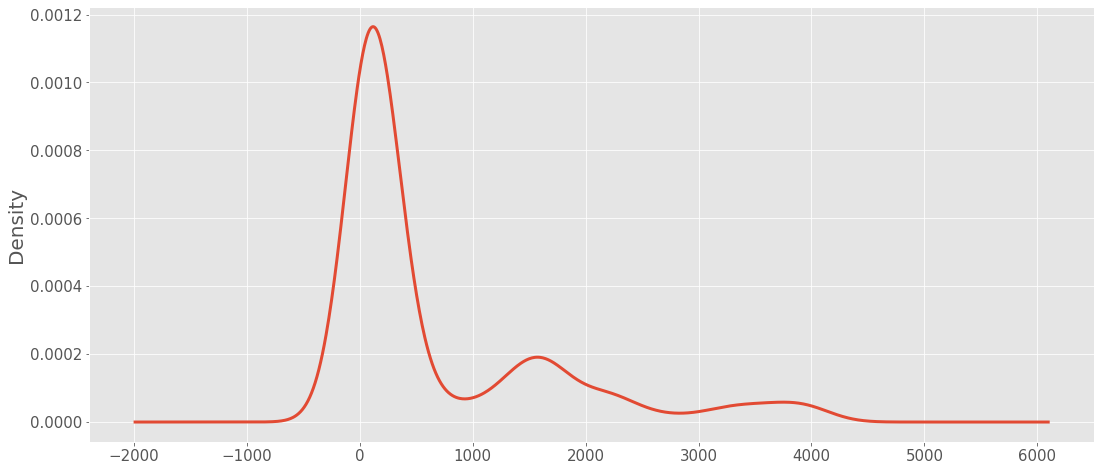

In [186]:
close.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

*  The histogram and kernel density estimation (KDE)  visualization shows the distribution of close stock price.



*  The distribution of the close stock price column is not normally distributed , so we log normal method to get normal    distribution of data from library NUMPY (np.log) .


### 5.6 Log Transformation 

In [187]:
#d---difference toconvert into stationary
df_close=np.log(close)

In [188]:
adani_close_diff_1=df_close.diff(1)

In [189]:
adani_close_diff_1=adani_close_diff_1.dropna()

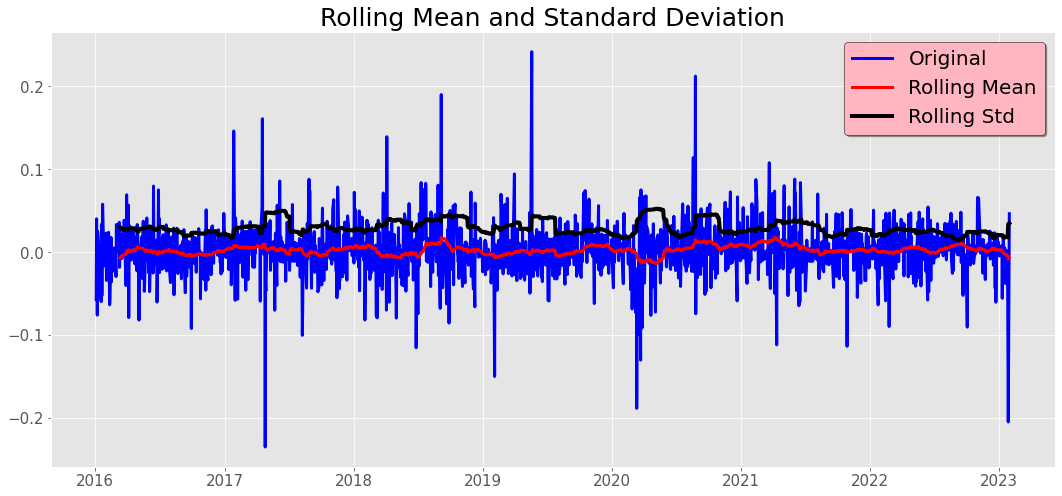

Results of dickey fuller test
Test Statistics               -1.882934e+01
p-value                        2.022124e-30
No. of lags used               3.000000e+00
Number of observations used    1.744000e+03
critical value (1%)           -3.434105e+00
critical value (5%)           -2.863199e+00
critical value (10%)          -2.567653e+00
dtype: float64


In [190]:
test_stationarity(adani_close_diff_1)


In order for a time series to be considered stationary, it must satisfy three conditions:
* Constant Mean with Time.

* Constant Variance with Time.

* Constant Autocorellation with Time.

### 5.7 Stationary Timeseries Data 

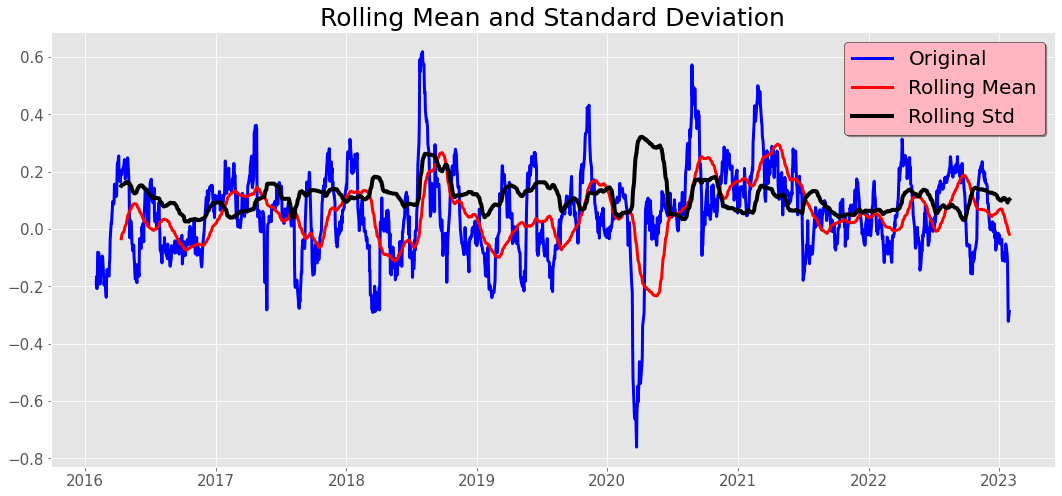

Results of dickey fuller test
Test Statistics                  -5.431869
p-value                           0.000003
No. of lags used                 24.000000
Number of observations used    1704.000000
critical value (1%)              -3.434193
critical value (5%)              -2.863238
critical value (10%)             -2.567674
dtype: float64


In [191]:
adani_close_diff_3=df_close.diff(20)
adani_close_diff_3=adani_close_diff_3.dropna()
test_stationarity(adani_close_diff_3)

In [192]:
adani_close_diff_3

Date
2016-02-01   -0.189450
2016-02-02   -0.166467
2016-02-03   -0.208160
2016-02-04   -0.177118
2016-02-05   -0.081399
                ...   
2023-01-23   -0.078440
2023-01-24   -0.090929
2023-01-25   -0.113875
2023-01-27   -0.322031
2023-01-30   -0.287997
Name: Close, Length: 1729, dtype: float64

### 5.8 Auto Correlation Function(ACF) and Partial Auto Correlation Function(PACF)

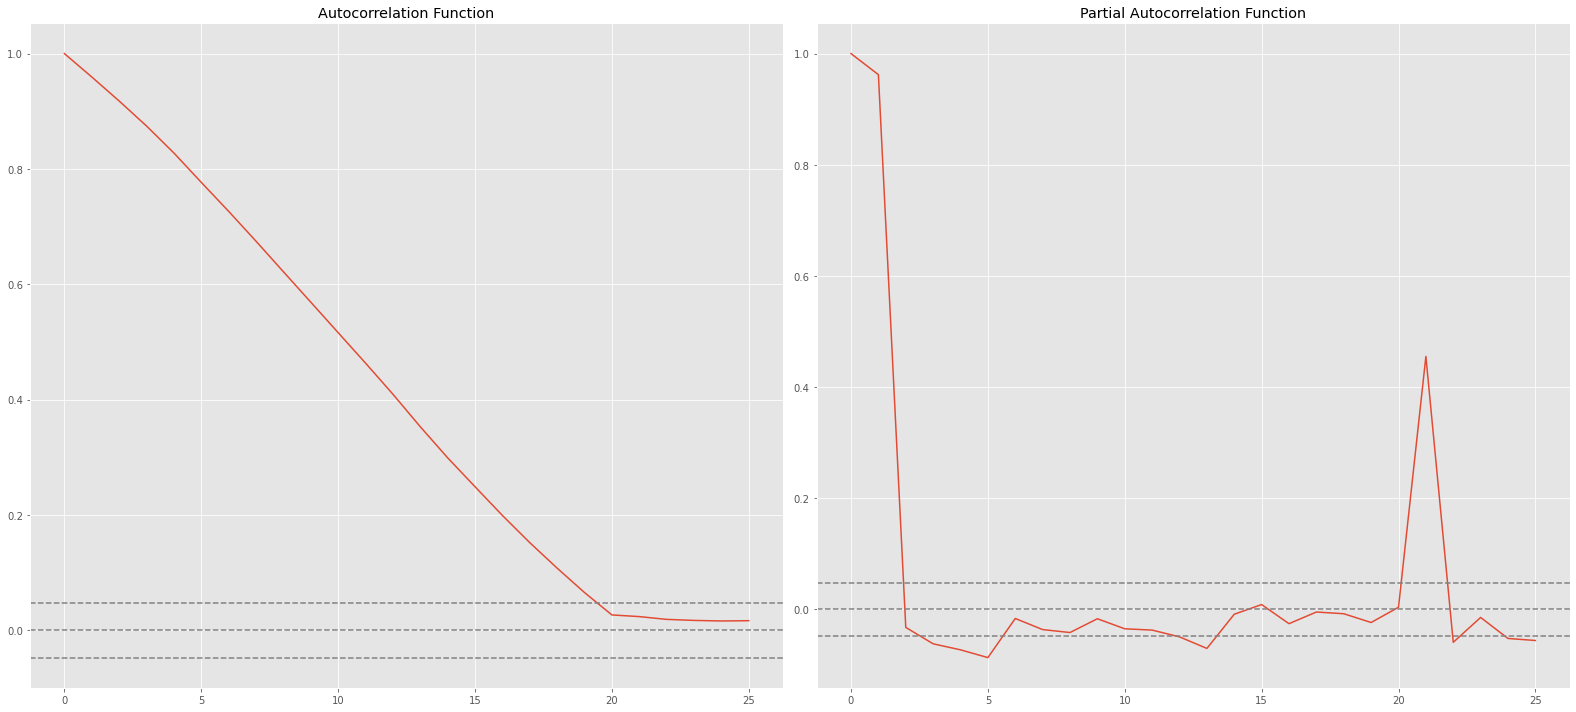

In [193]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(adani_close_diff_3, nlags=25)
lag_pacf = pacf(adani_close_diff_3, nlags=25, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(adani_close_diff_3)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(adani_close_diff_3)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(adani_close_diff_3)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(adani_close_diff_3)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


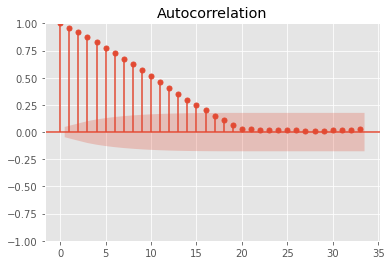

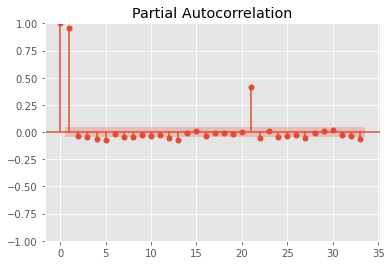

In [194]:
plot_acf(adani_close_diff_3)
plot_pacf(adani_close_diff_3);

In [195]:
#df_close.shape,adani_close_diff_3.shape,data.shape

In [196]:
#spliting training_data and testing_data
#train_data=df_close[0:-60]
#test_data=df_close[-60:]

## 6) Model Training

### 6.1 spliting training_data and testing_data

In [197]:
train_data=adani_close_diff_3[0:-60]
test_data=adani_close_diff_3[-60:]

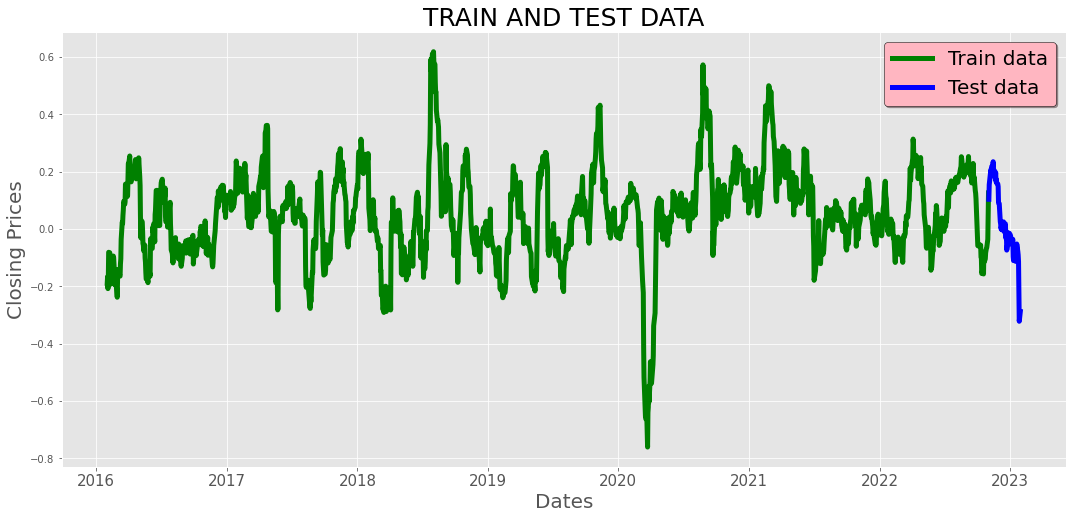

In [198]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.title('TRAIN AND TEST DATA', fontsize = 25)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

### 6.2 Shape of Train and Test Data 

In [199]:
df_close.shape,train_data.shape,test_data.shape

((1749,), (1669,), (60,))

In [200]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [136]:
history=[x for x in train_data]
history

[-0.18945009916908218,
 -0.16646673992188488,
 -0.20816041673509478,
 -0.17711770241392966,
 -0.08139862167764189,
 -0.0825866170950702,
 -0.09349034273077406,
 -0.11046152885238048,
 -0.17455950126377928,
 -0.19213820814298188,
 -0.12969845049172868,
 -0.10599471566437568,
 -0.13965856169848534,
 -0.09443845012982077,
 -0.10042377415736636,
 -0.16871959510936563,
 -0.1961824362776654,
 -0.181366433980084,
 -0.17968789974665889,
 -0.18575920041572447,
 -0.23817890385753637,
 -0.1705932207494154,
 -0.14160526672606766,
 -0.14496574058225953,
 -0.15369858204355502,
 -0.16446854766615715,
 -0.12179104187118517,
 -0.10405593639002486,
 -0.03674962444874108,
 0.023856463622672575,
 0.01894712286559397,
 0.04724069208674342,
 0.0659748335954724,
 0.09589087995811107,
 0.08595169396389268,
 0.09487230438055061,
 0.15625968632217369,
 0.11286095950484754,
 0.1166749675360923,
 0.18094331627625238,
 0.22806759240193974,
 0.22528121404684542,
 0.2545119084211529,
 0.17496120451742492,
 0.1778283

### 6.3  ARIMA MODEL

In [67]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [68]:
# evaluate different combinations of p, d and q values for an ARIMA model to get the best order for ARIMA Model
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [125]:
# evaluate parameters by range of orders
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

#Calling Function
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.128
ARIMA(0, 0, 1) RMSE=0.078
ARIMA(0, 0, 2) RMSE=0.117
ARIMA(0, 1, 0) RMSE=0.037
ARIMA(0, 1, 1) RMSE=0.038
ARIMA(0, 1, 2) RMSE=0.037
ARIMA(0, 2, 0) RMSE=0.059
ARIMA(0, 2, 1) RMSE=0.037
ARIMA(0, 2, 2) RMSE=0.038
ARIMA(1, 0, 0) RMSE=0.038
ARIMA(1, 0, 1) RMSE=0.038
ARIMA(1, 0, 2) RMSE=0.038
ARIMA(1, 1, 0) RMSE=0.038
ARIMA(1, 1, 1) RMSE=0.038
ARIMA(1, 1, 2) RMSE=0.037
ARIMA(1, 2, 0) RMSE=0.044
ARIMA(1, 2, 1) RMSE=0.038
ARIMA(1, 2, 2) RMSE=0.038
ARIMA(2, 0, 0) RMSE=0.038
ARIMA(2, 0, 1) RMSE=0.038
ARIMA(2, 0, 2) RMSE=0.038
ARIMA(2, 1, 0) RMSE=0.037
ARIMA(2, 1, 1) RMSE=0.037
ARIMA(2, 1, 2) RMSE=0.037
ARIMA(2, 2, 0) RMSE=0.041
ARIMA(2, 2, 1) RMSE=0.037
ARIMA(2, 2, 2) RMSE=0.038
Best ARIMA(1, 1, 2) RMSE=0.037


### 6.3.1 Best ARIMA Order  

In [137]:
history=[x for x in train_data]
predictions=list()
conf_list=list()
for t in range(len(test_data)):
    model=ARIMA(history,order=(1,1,2))
    model_fit = model.fit()
    fc= model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test_data[t])
print("RMSE of ARIMA Model:",np.sqrt(mean_squared_error(test_data,predictions)))

RMSE of ARIMA Model: 0.03707161192880058


In [78]:
#import pickle
#file=open('arimamodel.pkl','wb')
#pickle.dump(model_fit,file)

### 6.3.2 ARIMA Model Summary 

In [138]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1728
Model:                 ARIMA(1, 1, 2)   Log Likelihood                2982.565
Date:                Mon, 31 Jul 2023   AIC                          -5957.131
Time:                        09:55:11   BIC                          -5935.314
Sample:                             0   HQIC                         -5949.061
                               - 1728                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7164      0.149      4.798      0.000       0.424       1.009
ma.L1         -0.7080      0.153     -4.640      0.000      -1.007      -0.409
ma.L2          0.0476      0.024      1.968      0.049       0.000       0.095
sigma2         0.0019   3.55e-05     52.113      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1387.22
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6.3.3 ARIMA Forecast vs Actual

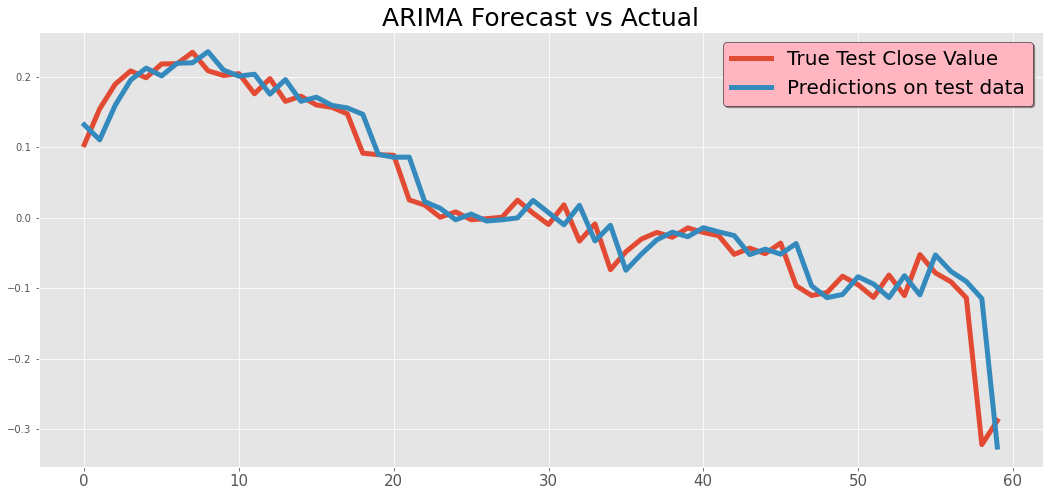

In [139]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.title('ARIMA Forecast vs Actual', fontsize = 25)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [80]:
#pip install statsmodels --upgrade

### 6.4 SARIMAX Model 

In [140]:
import statsmodels.api as sm
history=[x for x in train_data]
predictions=list()
conf_list=list()
for t in range(len(test_data)):
    model=sm.tsa.statespace.SARIMAX(history,order=(1,1,2),seasonal_order=(1,1,1,3))
    model_fits=model.fit()
    fc=model_fits.forecast(alpha=0.05)
    predictions.append(fc)
    history.append(test_data[t])
print("RMSE of ARIMA Model:",np.sqrt(mean_squared_error(test_data,predictions)))

RMSE of ARIMA Model: 0.03744501476852395


### 6.4.1 SARIMAX model summary

In [141]:
model_fits.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1728
Model:             SARIMAX(1, 1, 2)x(1, 1, [1], 3)   Log Likelihood                2967.239
Date:                             Mon, 31 Jul 2023   AIC                          -5922.478
Time:                                     10:00:44   BIC                          -5889.763
Sample:                                          0   HQIC                         -5910.375
                                            - 1728                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6894      0.218     -3.169      0.002      -1.116      -0.263
ma.L1          0.7033      0.219      3.217      0.001       0.275       1.132
ma.L2          0.0533      0.025      2.171      0.030       0.005       0.101
ar.S.L3        0.0812      0.027      3.053      0.002       0.029       0.133
ma.S.L3       -0.9996      0.029    -34.737      0.000      -1.056      -0.943
sigma2         0.0019   6.11e-05     30.351      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1393.66
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6.4.2 SARIMAX Forecast vs Actual

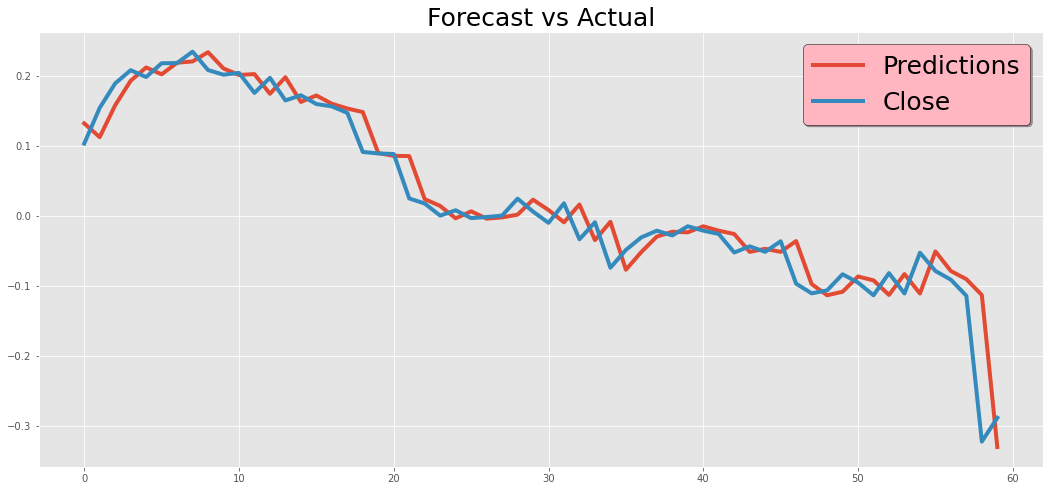

In [142]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [81]:
#! pip install pmdarima

### 6.5 AUTO ARIMA Model

### 6.5.1  spliting training_data and testing_data

In [143]:
#spliting training_data and testing_data
train_data=df_close[0:-60]
test_data=df_close[-60:]

In [153]:
history=[x for x in train_data]
print(history)


[3.893769417750364, 3.836676290965261, 3.8769811072527496, 3.8500993026713384, 3.774250724363506, 3.7995684979163706, 3.8038277200490525, 3.7848262267046153, 3.7854448458101015, 3.7469906611245, 3.7023051497758317, 3.64277203192209, 3.6764358779562, 3.6240529981937906, 3.63561382120807, 3.6935302722733634, 3.698264823426185, 3.6867275654614216, 3.670209551043376, 3.681251762095672, 3.7043193185812817, 3.670209551043376, 3.668820690517655, 3.6729816002574087, 3.692852102685864, 3.7169818808213004, 3.7103373773182784, 3.674364697852235, 3.6108853445463223, 3.554852452981518, 3.572606699284103, 3.5367773162577145, 3.5367773162577145, 3.52961454806397, 3.535190047050704, 3.5248106771639978, 3.5020823871485196, 3.5053611314813375, 3.490521651296717, 3.4954925616799475, 3.4661404147237453, 3.4996163302939607, 3.527215423791587, 3.528015859675149, 3.539153520642309, 3.5525133331551433, 3.5885463354470932, 3.57030876146221, 3.574135720097581, 3.5787089166041905, 3.591553822149697, 3.5840180083

### 6.5.2 Building Auto ARIMA Model

In [146]:
from pmdarima.arima import auto_arima

In [147]:
mdl_auto=auto_arima(history)

In [148]:
mdl_auto

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

### 6.5.3 Auto ARIMA Model Summary 

In [149]:
mdl_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1689
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3466.866
Date:                Mon, 31 Jul 2023   AIC                          -6929.733
Time:                        10:10:57   BIC                          -6918.870
Sample:                             0   HQIC                         -6925.710
                               - 1689                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0025      0.001      3.361      0.001       0.001       0.004
sigma2         0.0010   1.45e-05     66.341      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):              5031.94
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.15
Prob(H) (two-sided):                  0.11   Kurtosis:                        11.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6.5.4  Tune Auto_ARIMA Model

In [ ]:
#exogenous -> outside factors (e.g other time series)
#m-> seasonal cycle length
#max_order -> maximum amount of variables to be used in the regression (p + q)
#max_p -> maximum AR components
#max_q -> maximum MA components
#max_d -> maximum Integrations
#maxiter -> maximum iterations we're giving the model to converge the coefficients (becomes harder as the order increases)
# return_valid_fits -> whether or not the method should validate the results
#alpha -> Level of significance, default is 5%, which we should be using most of the time
#n_jobs -> how many models to fit at a time (-1 indicates "as many as possible") #trend -> "ct" usually
# information criterion -> 'aic', 'aicc', 'bic', 'hqic', 'oob'
#(Akaike Information Criterion, Corrected Akaike Information Criterion, Bavesian Information Criterion. Hannan-Quinn Information Criterion. or

RMSE of Auto ARIMA Model : 0.0340567790488277


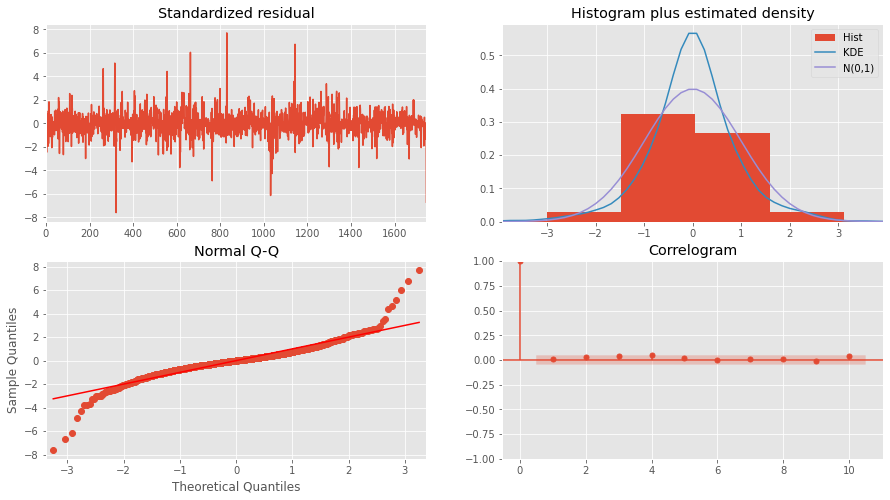

In [166]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model_autoARIMA = auto_arima(history,m=5,max_order=None,max_p=7,max_q=7,max_d=2,max_P=4,max_Q=4,max_D=2,maxiter=50,alpha=0.05,n_jobs=-1,trend='ct')
    
    fc, confint = model_autoARIMA.predict(n_periods=1, return_conf_int=True)
    predictions.append(fc)
    history.append(test_data[t])
    conf_list.append(confint)

print('RMSE of Auto ARIMA Model :', np.sqrt(mean_squared_error(test_data, predictions)))
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [169]:
model_autoARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1748
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3584.159
Date:                Mon, 31 Jul 2023   AIC                          -7162.318
Time:                        11:54:11   BIC                          -7145.921
Sample:                             0   HQIC                         -7156.256
                               - 1748                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0007      0.002      0.485      0.628      -0.002       0.004
drift       1.789e-06   1.59e-06      1.128      0.260   -1.32e-06     4.9e-06
sigma2         0.0010   1.39e-05     69.676      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):              6087.80
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.00
Prob(H) (two-sided):                  0.01   Kurtosis:                        12.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6.5.5 AUTO ARIMA Forecast and Actual Close  

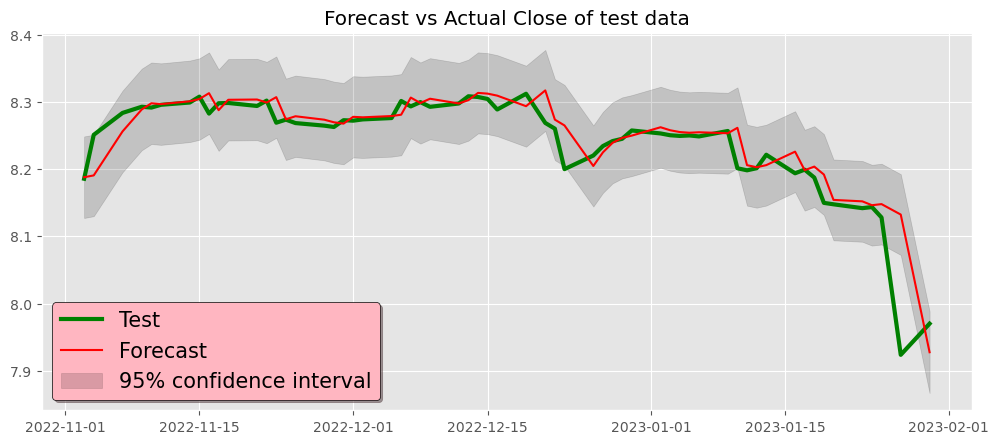

In [167]:
lower_series = []
upper_series = []
for i in conf_list:
    lower_series.append(i[0][0])
    upper_series.append(i[0][1])
fc_series = pd.Series(predictions, index=test_data.index)
lower_series = pd.Series(lower_series, index=test_data.index)
upper_series = pd.Series(upper_series, index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
# plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15, label = '95% confidence interval')
plt.title('Forecast vs Actual Close of test data')
plt.legend(fontsize = 15, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

### 7) Final Best Model 

In [170]:
from pmdarima.arima import auto_arima

RMSE of Auto ARIMA Model : 0.03359742869526753


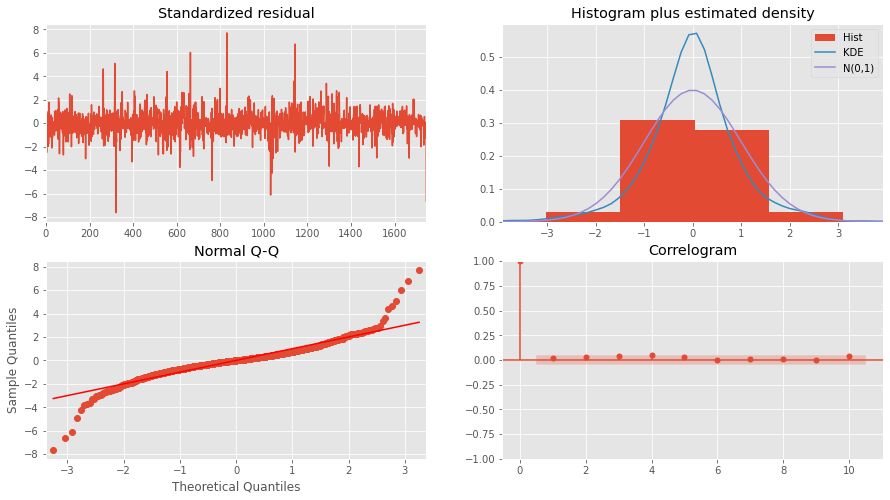

In [171]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model_autoARIMA = auto_arima(history, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   
                      start_P=0, 
                      D=0, 
                      trace=False,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    fc, confint = model_autoARIMA.predict(n_periods=1, return_conf_int=True)
    predictions.append(fc)
    history.append(test_data[t])
    conf_list.append(confint)

print('RMSE of Auto ARIMA Model :', np.sqrt(mean_squared_error(test_data, predictions)))
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [172]:
model_autoARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1748
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3583.425
Date:                Mon, 31 Jul 2023   AIC                          -7162.849
Time:                        11:59:28   BIC                          -7151.918
Sample:                             0   HQIC                         -7158.808
                               - 1748                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0023      0.001      3.099      0.002       0.001       0.004
sigma2         0.0010   1.39e-05     69.660      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):              6041.99
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                        12.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

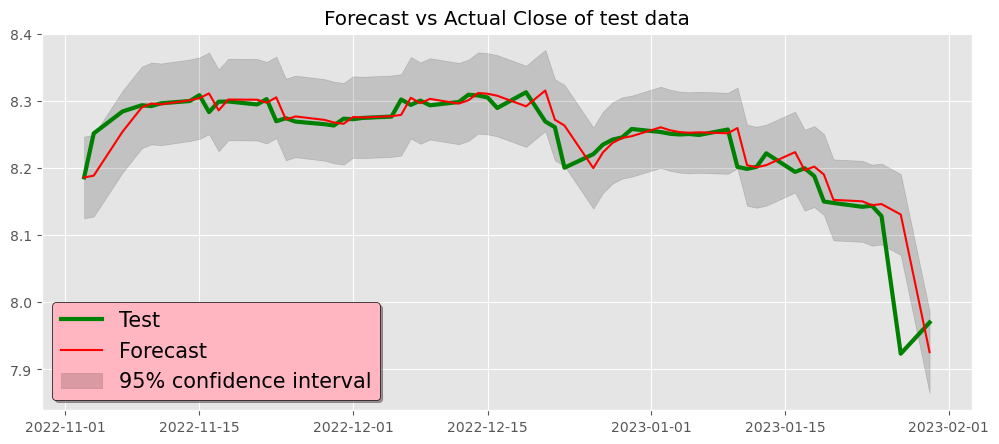

In [159]:
lower_series = []
upper_series = []
for i in conf_list:
    lower_series.append(i[0][0])
    upper_series.append(i[0][1])
fc_series = pd.Series(predictions, index=test_data.index)
lower_series = pd.Series(lower_series, index=test_data.index)
upper_series = pd.Series(upper_series, index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
# plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15, label = '95% confidence interval')
plt.title('Forecast vs Actual Close of test data')
plt.legend(fontsize = 15, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

## 7.1 Forecasting Adani Stock Price For Next  120 Days 2023

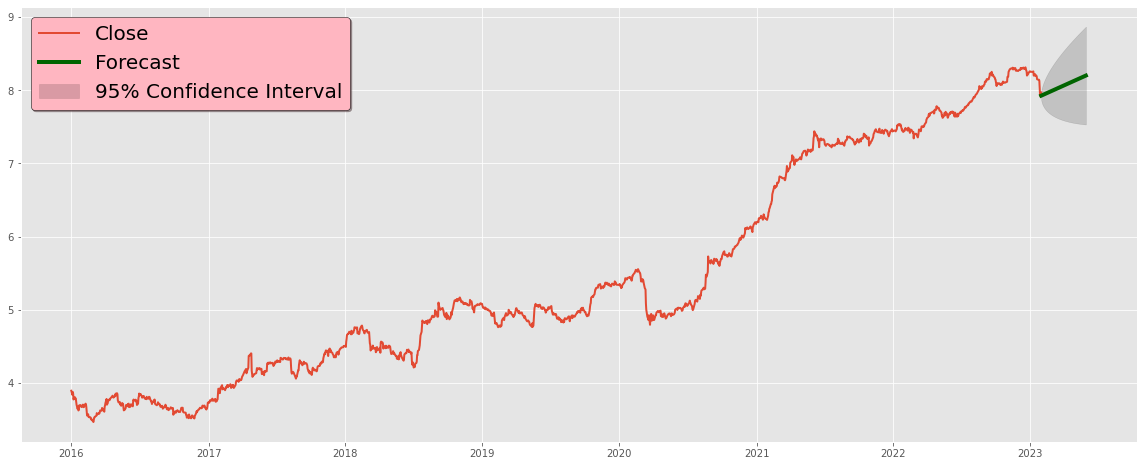

In [117]:
fc, confint = model_autoARIMA.predict(n_periods=120, return_conf_int=True)

# make series for plotting purpose
fc_series = pd.Series(fc, index=pd.date_range(start='30/1/2023', periods=120))
lower_series = pd.Series(confint[:, 0], index=pd.date_range(start='30/1/2023', periods=120))
upper_series = pd.Series(confint[:, 1], index=pd.date_range(start='30/1/2023', periods=120))

# Plot
plt.figure(figsize = (20,8))
plt.plot(df_close, linewidth = 2, label = 'Close')
plt.plot(fc_series, color='darkgreen', linewidth = 4, label = 'Forecast')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15, label = '95% Confidence Interval')
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()